In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca
import pandas as pd
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing


In [2]:
df = pd.read_csv("data/glass.data", sep=',', index_col='Id') #, usecols=['Vmag','B-V'])
df.dropna(inplace=True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [3]:
X0 = df.values[:,:-1]
X0 = preprocessing.robust_scale(X0)
Y = df['Class'].values

In [4]:
pca_sk = decomposition.PCA()
pca_sk = pca_sk.fit(X0)
U0 = pca_sk.transform(X0)

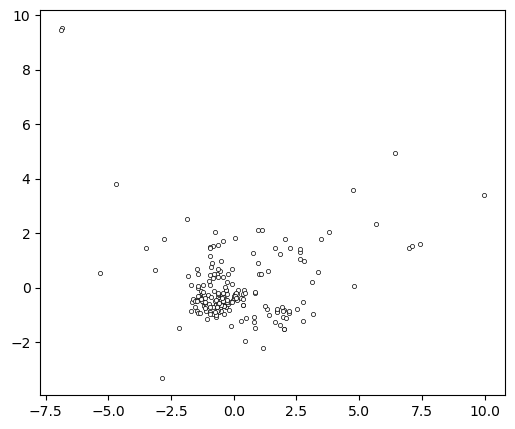

In [5]:
plt.figure(figsize=(6,5))
plt.scatter(U0[:,0], U0[:,1], s=9, c='w', edgecolors='k', linewidth=0.5)
plt.show()

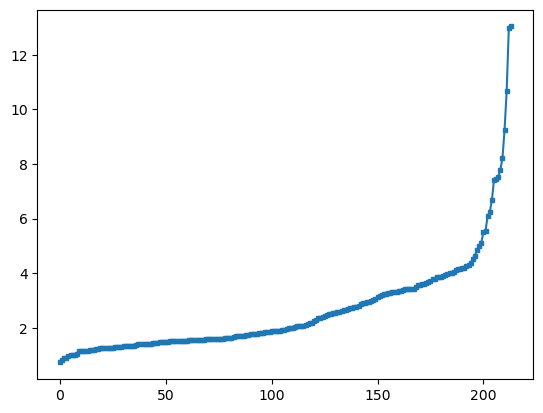

[ 0.26012165  0.11754819 -0.53566821  0.19296941 -0.17221724 -0.11885933
  0.38280173  0.17504673  0.57009346]


In [6]:
c0 = pca.location(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=3)
plt.show()
print(c0)

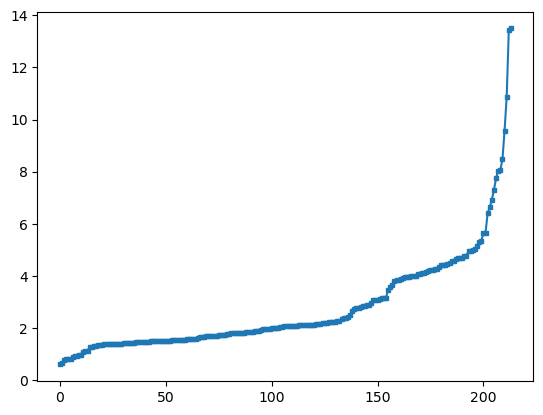

[ 0.22499099  0.04252719 -0.04273281 -0.44891627 -0.08680347 -0.32274136
  0.10353078  0.06200933  1.18644796]


In [23]:
alpha=0.66
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
c = pca.robust_location(X0, wma)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=3)
plt.show()
print(c)

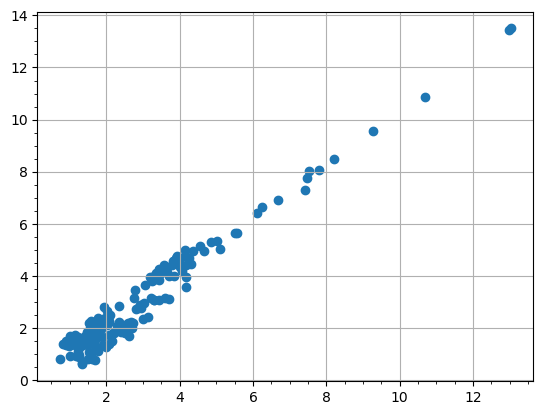

In [24]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [25]:
X1 = X0 - c
X1_0 = X0 - c0

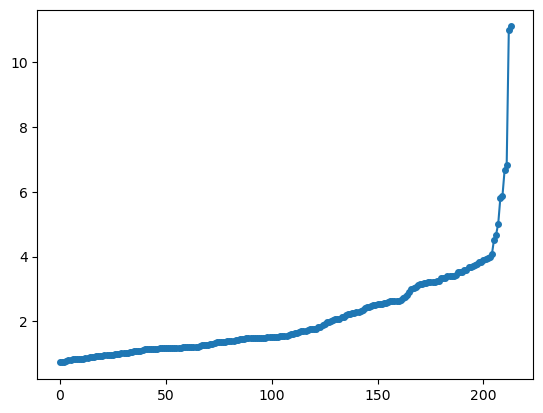

4.056563974434328 [ 0.51968168 -0.08865678 -0.11063292 -0.2617092  -0.13557401 -0.3331923
  0.71001847 -0.0273094   0.08408406]


In [26]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4)
plt.show()
print(L1_0, a1_0)

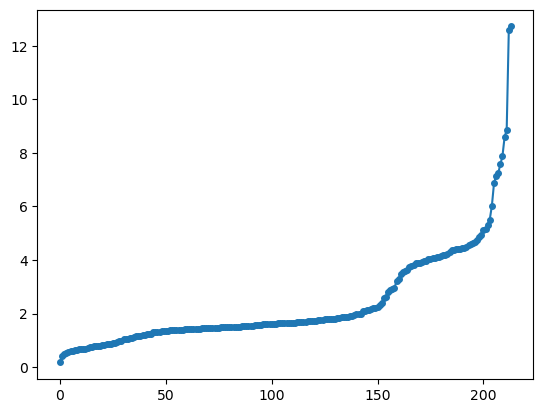

4.200402364099764 [ 0.49025182  0.28946859  0.07626775 -0.3091416  -0.51507993 -0.26306013
  0.34833245 -0.01428599 -0.34413403]


In [27]:
a1, L1 = pca.find_robust_pc(X1, wma)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.show()
print(L1, a1)
U1 = pca.project_line(X1, a1)
U1_0 = pca.project_line(X1_0, a1_0)

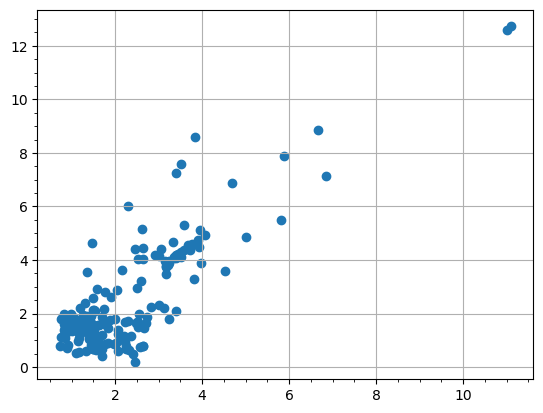

In [28]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [29]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

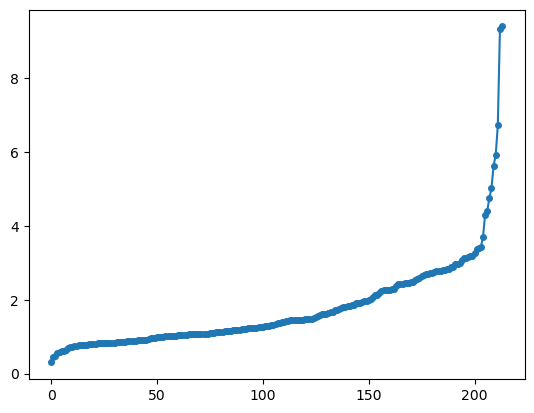

2.9476600105748574 [ 0.01754939  0.11925677 -0.53969855  0.62326625 -0.09425235  0.26783712
  0.24631494  0.15446477 -0.37494513]


In [30]:
a2_0, L2_0 = pca.find_pc(X2)
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

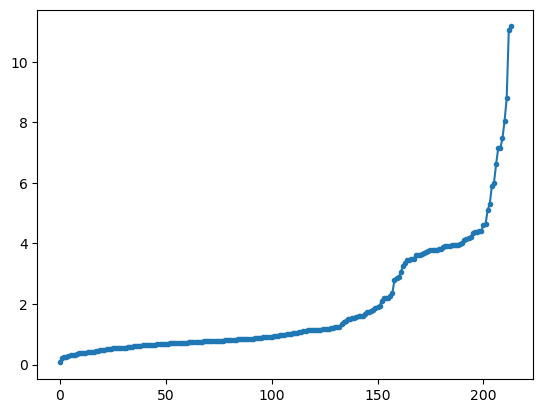

2.082413439982661 [ 0.10723996  0.07324861 -0.04722898 -0.5132578   0.12501037 -0.18009756
  0.18085991  0.03600657  0.79712018]


In [31]:
a2, L2 = pca.find_robust_pc(X2, wma)
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

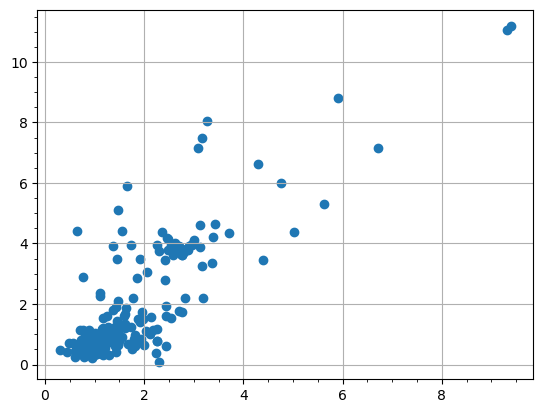

In [32]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [33]:
X3 = pca.project(X2, a2)
X3_0 = pca.project(X2_0, a2_0)

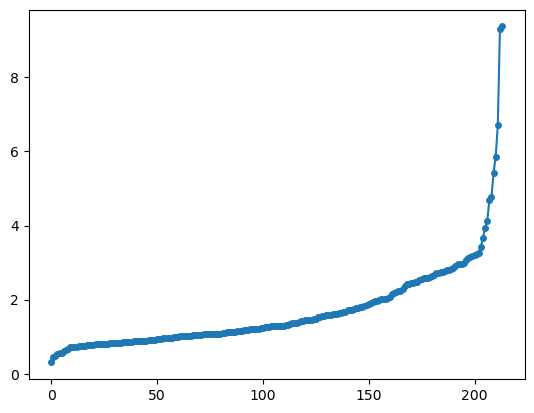

2.8210621115388776 [ 0.18862723 -0.16102488 -0.57392004  0.40108131  0.11382032  0.07925731
  0.6444475   0.0985664   0.06305259]


In [34]:
a3_0, L3_0 = pca.find_pc(X3)
plt.plot(sorted(pca.distance_line(X3_0, a3_0)), marker='o', markersize=4)
plt.show()
print(L3_0, a3_0)

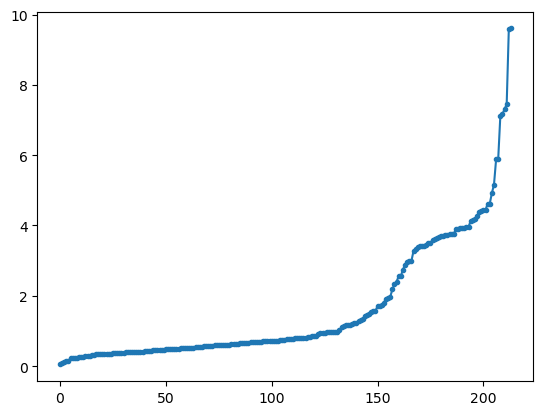

0.9855684280213154 [ 0.2256041  -0.19809373  0.19330599  0.47235916 -0.59020436  0.28894534
  0.02080348 -0.07456425  0.45994355]


In [35]:
a3, L3 = pca.find_robust_pc(X3, wma)
plt.plot(sorted(pca.distance_line(X3, a3)), marker='o', markersize=3)
plt.show()
print(L3, a3)
U3 = pca.project_line(X3, a3)
U3_0 = pca.project_line(X3_0, a3_0)

In [36]:
def positive(U):
    if max(U[U>0]) < max(abs(U[U<0])):
        U = -U
    return U

U1 = positive(U1)
U2 = positive(U2)
U3 = positive(U3)
U1_0 = positive(U1_0)
U2_0 = positive(U2_0)
U3_0 = positive(U3_0)


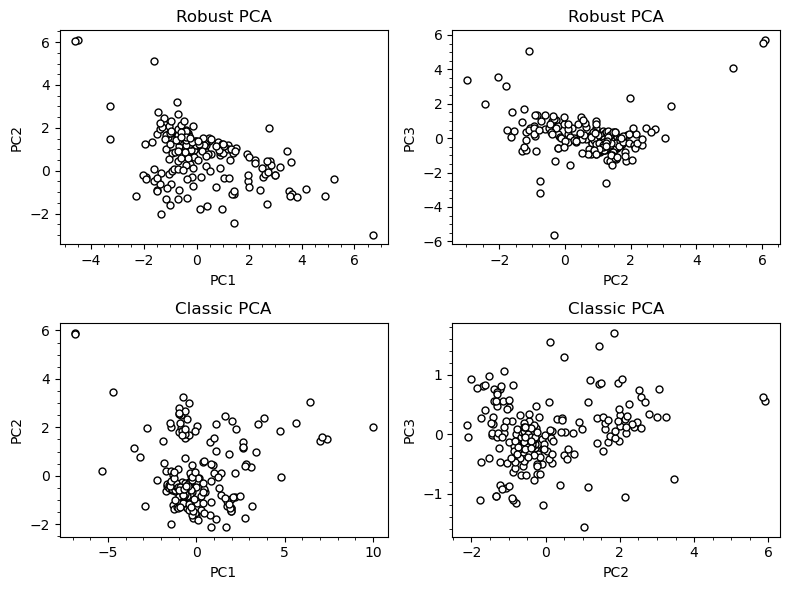

In [37]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.title('Robust PCA')
plt.scatter(U1, U2, s=25, c='w', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,2)
plt.title('Robust PCA')
plt.scatter(U2, U3, s=25, c='w', edgecolors='k')
plt.xlabel('PC2')
plt.ylabel('PC3')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,3)
plt.title('Classic PCA')
plt.scatter(U1_0, U2_0, s=25, c='w', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,4)
plt.title('Classic PCA')
plt.scatter(U2_0, U3_0, s=25, c='w', edgecolors='k')
plt.xlabel('PC2')
plt.ylabel('PC3')
# plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.savefig('fig/robust_pca_glass.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


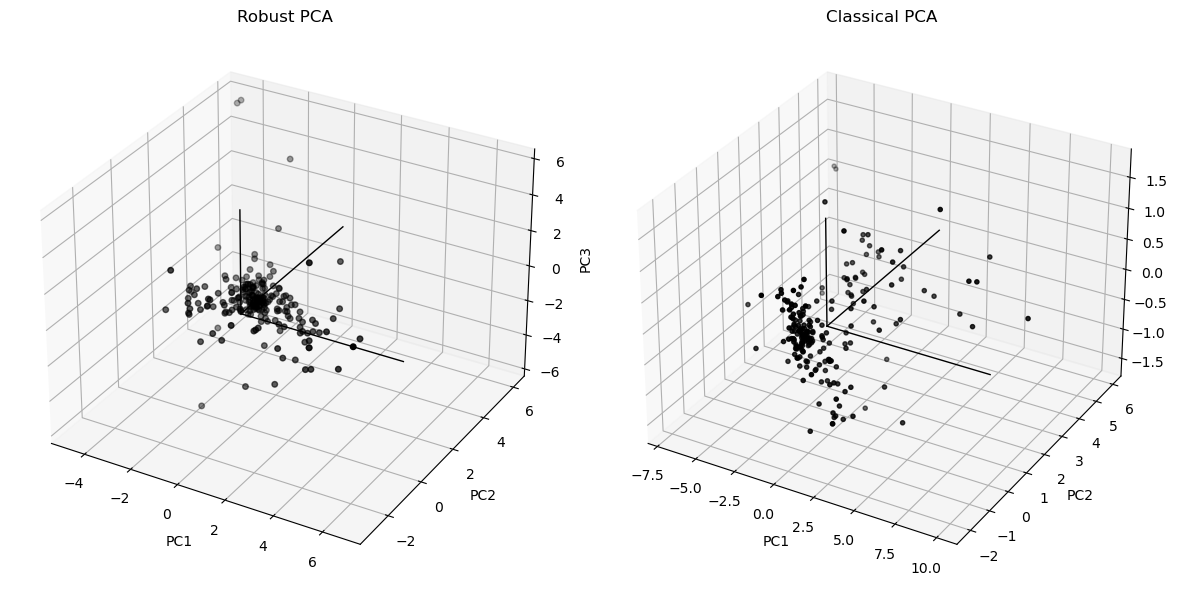

In [38]:
fig, axes = plt.subplots(1, 2, 
                         subplot_kw={"projection": "3d"}, )
fig.set_size_inches(14, 6)
ax1, ax2 = axes
ax1.scatter(U1, U2, U3, s=16, c='k')

ax1.plot([0, U1.max()], [0, 0], [0, 0], color='k', linewidth=1.0)
ax1.plot([0, 0], [0, U2.max()], [0, 0], color='k', linewidth=1.0)
ax1.plot([0, 0], [0, 0], [0, U3.max()], color='k', linewidth=1.0)

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3', rotation='vertical')

ax1.set_title('Robust PCA')

ax2.scatter(U1_0, U2_0, U3_0, s=9, c='k')

ax2.plot([0, U1_0.max()], [0, 0], [0, 0], color='k', linewidth=1.0)
ax2.plot([0, 0], [0, U2_0.max()], [0, 0], color='k', linewidth=1.0)
ax2.plot([0, 0], [0, 0], [0, U3_0.max()], color='k', linewidth=1.0)

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3', rotation='vertical')

ax2.set_title('Classical PCA')

fig.set_tight_layout(True)

plt.savefig('fig/robust_pca_glass_1.eps')

plt.show()